In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing FRAV 3D dataset
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,106):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(1484, 100, 100, 3)

In [3]:
Xtest.shape

(212, 100, 100, 3)

In [4]:
ytrain.shape

(1484,)

In [5]:
ytest.shape

(212,)

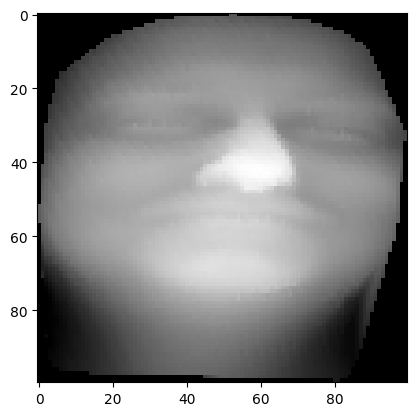

In [6]:
plt.imshow(Xtrain[1483])

In [7]:
ytrain[1483]

105

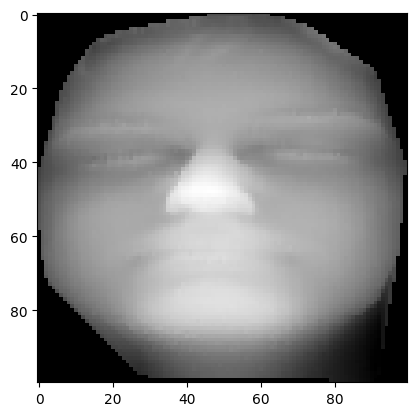

In [8]:
plt.imshow(Xtrain[211])

In [9]:
ytest[211]

105

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import InceptionResNetV2

In [21]:
base_model=InceptionResNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [22]:
for layer in base_model.layers[:-25]:
    layer.trainable=False

In [23]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(106,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1, 1, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 250)               384250    
                                                                 
 dense_5 (Dense)             (None, 106)               26606     
                                                                 
Total params: 54747592 (208.85 MB)
Trainable params: 6576008 (25.09 MB)
Non-trainable params: 48171584 (183.76 MB)
_________________________________________________________________


In [24]:
model.fit(Xtrain,ytrain,epochs=7,validation_data=(Xtest,ytest))

Epoch 1/7
47/47 [==============================] - 117s 2s/step - loss: 3.8795 - accuracy: 0.1954 - val_loss: 5.9865 - val_accuracy: 0.1179
Epoch 2/7
47/47 [==============================] - 85s 2s/step - loss: 1.4433 - accuracy: 0.6590 - val_loss: 6.0693 - val_accuracy: 0.1792
Epoch 3/7
47/47 [==============================] - 84s 2s/step - loss: 0.5561 - accuracy: 0.8699 - val_loss: 2.8990 - val_accuracy: 0.4434
Epoch 4/7
47/47 [==============================] - 84s 2s/step - loss: 0.2547 - accuracy: 0.9515 - val_loss: 3.9557 - val_accuracy: 0.3962
Epoch 5/7
47/47 [==============================] - 84s 2s/step - loss: 0.0996 - accuracy: 0.9811 - val_loss: 1.4104 - val_accuracy: 0.6840
Epoch 6/7
47/47 [==============================] - 83s 2s/step - loss: 0.0507 - accuracy: 0.9939 - val_loss: 0.8555 - val_accuracy: 0.7877
Epoch 7/7
47/47 [==============================] - 84s 2s/step - loss: 0.0504 - accuracy: 0.9906 - val_loss: 0.8377 - val_accuracy: 0.8255


In [25]:
yprob=model.predict(Xtest)
yprob.shape

7/7 [==============================] - 15s 1s/step


(212, 106)

In [26]:
ypred=yprob.argmax(axis=1)
ypred.shape

(212,)

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.67    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

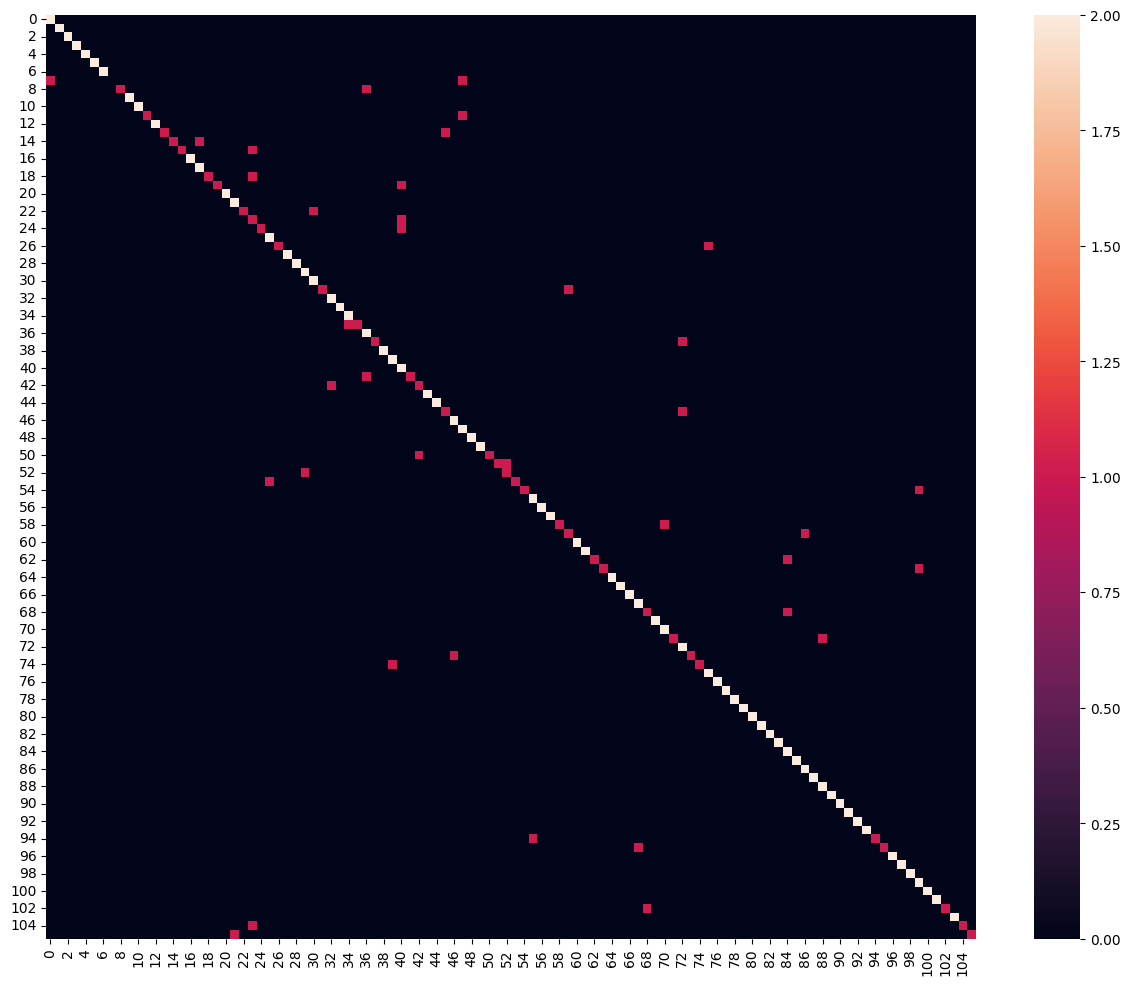

In [28]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()